<a href="https://colab.research.google.com/github/gkothari25/fashion_mnist_classification/blob/main/assignment_capgemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#select the 5k images having 500 each class
import numpy as np
import random

index_dict = {}
count_index = 0
val_dict = {}
count_val = 0

#create a tensor and copy the desired data from the all the data files to that.
train_t = np.ones((5000,28,28))
lable_train = []
val_t = np.ones((1500,28,28))
lable_val = []

for k in list(set(y_train)):
  index_list = []
  
  for sn,i in enumerate(zip(x_train,y_train)):
    if int(i[1]) == k:
      index_list.append(sn) 
  index_dict[k] = index_list

  #select the n random value from the list
  random.seed(4)
  t_list = random.sample(index_list,k=500)
  resid_list = list(set(index_list).difference(t_list))
  val_list = random.sample(resid_list,k=150)
  val_dict[k] = val_list
  
  for index in t_list:
    train_t[count_index] = x_train[index]
    lable_train.append(k)
    count_index  = count_index + 1
  print("tr",t_list[:10])

  for val in val_list:
    val_t[count_val] = x_train[val]
    lable_val.append(k)
    count_val = count_val + 1
  print("val",val_list[:10])


In [ ]:
#now lets create a network for the classification with 5 CNN layers.
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

In [ ]:
import tensorflow as tf

def create_model():
    """
    Creates a simple sequential model
    """
    
    cnn = tf.keras.Sequential()
    
    cnn.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
    
    # Normalization
    cnn.add(tf.keras.layers.BatchNormalization())
    
    # Conv + Maxpooling
    cnn.add(tf.keras.layers.Convolution2D(64, (4, 4), padding='same', activation='relu'))
    cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Dropout
    cnn.add(tf.keras.layers.Dropout(0.1))
    
    # Conv + Maxpooling
    cnn.add(tf.keras.layers.Convolution2D(64, (4, 4), activation='relu'))
    cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Dropout
    cnn.add(tf.keras.layers.Dropout(0.3))

    # Converting 3D feature to 1D feature Vektor
    cnn.add(tf.keras.layers.Flatten())

    # Fully Connected Layer
    cnn.add(tf.keras.layers.Dense(256, activation='relu'))

    # Dropout
    cnn.add(tf.keras.layers.Dropout(0.5))
    
    # Fully Connected Layer
    cnn.add(tf.keras.layers.Dense(64, activation='relu'))
    
    # Normalization
    cnn.add(tf.keras.layers.BatchNormalization())

    cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
    cnn.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

    return cnn

create_model().summary()


In [ ]:

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 64)        

In [ ]:
val_t.reshape(val_t.shape[0],28,28,1)[2].shape

(28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
epochs=50

# train_data   = np.expand_dims(train_t, axis=1)
train_data =    train_t.reshape(train_t.shape[0],28,28,1)
train_lables = np.array(lable_train)
one_hot_label_train = to_categorical(train_lables)

# val_data = np.expand_dims(val_t, axis=1)
val_data = val_t.reshape(val_t.shape[0],28,28,1)
val_lables = np.array(lable_val)
one_hot_label_val = to_categorical(val_lables)

train_data_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = train_data_gen.flow(train_data, one_hot_label_train, batch_size=batch_size)
test_generator = test_gen.flow(val_data, one_hot_label_val, batch_size=batch_size)


In [ ]:
# validation_data = train_data
# validation_labels = y_val1
model = create_model()
history = model.fit(train_generator,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = test_generator
              )
model.save_weights('bottleneck_fc_model.h5')

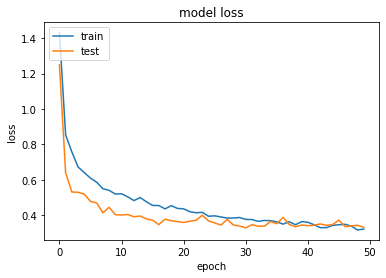

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

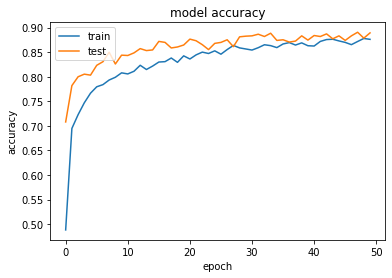

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x_test1 = x_test.reshape(x_test.shape[0],28,28,1)

one_hot_label_test = to_categorical(y_test)

test_loss, test_acc = model.evaluate(x_test1,  one_hot_label_test, verbose=2)

print(test_loss,test_acc)

313/313 - 5s - loss: 0.3517 - accuracy: 0.8794
0.35174089670181274 0.8794000148773193


In [ ]:
313/313 - 6s - loss: 0.4140 - accuracy: 0.8837
0.41400277614593506 0.8837000131607056

SyntaxError: ignored